In [146]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tools.eval_measures import aic
from statsmodels.tsa.api import VAR
import dataframe_image as dfi


In [2]:
data = pd.read_csv("C:/Users/sarfa/Desktop/FYP/DATA.csv")

In [3]:
data.head()

,DATE,IPI,IPILSM,TBR,CPI,M2,Exports,Imports,INR,EXRT,Unnamed: 10
0,01/01/1991,63.70,49.27,7.75,13.24,347058.0,509.31,686,NaN,22.1296,NaN
1,01/02/1991,59.50,45.95,7.75,13.24,349044.0,457.71,679,NaN,22.2054,NaN
2,01/03/1991,58.86,47.20,7.75,13.24,350665.0,524.12,761,0.10,22.5604,NaN
3,01/04/1991,53.30,39.00,8.79,13.24,352706.0,519.48,655,0.12,23.2502,NaN
4,01/05/1991,53.79,38.02,9.37,13.24,355137.0,554.77,738,0.12,23.7422,NaN


In [4]:
data = data.drop(columns="Unnamed: 10")

In [5]:
data["DATE"] = pd.to_datetime(data["DATE"])

In [6]:
data.dtypes

DATE       datetime64[ns]
IPI               float64
IPILSM            float64
TBR               float64
CPI               float64
M2                float64
Exports           float64
Imports            object
INR               float64
EXRT              float64
dtype: object

In [7]:
data.head()

,DATE,IPI,IPILSM,TBR,CPI,M2,Exports,Imports,INR,EXRT
0,1991-01-01,63.70,49.27,7.75,13.24,347058.0,509.31,686,NaN,22.1296
1,1991-01-02,59.50,45.95,7.75,13.24,349044.0,457.71,679,NaN,22.2054
2,1991-01-03,58.86,47.20,7.75,13.24,350665.0,524.12,761,0.10,22.5604
3,1991-01-04,53.30,39.00,8.79,13.24,352706.0,519.48,655,0.12,23.2502
4,1991-01-05,53.79,38.02,9.37,13.24,355137.0,554.77,738,0.12,23.7422


In [8]:
data["Imports"] = data["Imports"].str.replace(",","")

In [9]:
data["Imports"] = pd.to_numeric(data["Imports"])

In [10]:
data.set_index("DATE",inplace = True)

In [11]:
data.columns = data.columns.str.upper()

In [12]:
data.head()

,IPI,IPILSM,TBR,CPI,M2,EXPORTS,IMPORTS,INR,EXRT
DATE,,,,,,,,,
1991-01-01,63.70,49.27,7.75,13.24,347058.0,509.31,686.0,NaN,22.1296
1991-01-02,59.50,45.95,7.75,13.24,349044.0,457.71,679.0,NaN,22.2054
1991-01-03,58.86,47.20,7.75,13.24,350665.0,524.12,761.0,0.10,22.5604
1991-01-04,53.30,39.00,8.79,13.24,352706.0,519.48,655.0,0.12,23.2502
1991-01-05,53.79,38.02,9.37,13.24,355137.0,554.77,738.0,0.12,23.7422


In [13]:
data = data.drop(columns = ["IPI","INR","EXPORTS","IMPORTS","M2"], axis=1)

In [14]:
data.head()

,IPILSM,TBR,CPI,EXRT
DATE,,,,
1991-01-01,49.27,7.75,13.24,22.1296
1991-01-02,45.95,7.75,13.24,22.2054
1991-01-03,47.20,7.75,13.24,22.5604
1991-01-04,39.00,8.79,13.24,23.2502
1991-01-05,38.02,9.37,13.24,23.7422


In [15]:
data = data.drop(pd.Timestamp("1991-01-01"))
data = data.drop(pd.Timestamp("1991-01-02"))

In [16]:
data.tail(20)

,IPILSM,TBR,CPI,EXRT
DATE,,,,
2020-01-09,138.90,7.11,137.53,165.8541
2020-01-10,145.36,7.14,139.27,162.8000
2020-01-11,147.32,7.14,140.16,159.2122
2020-01-12,167.21,7.12,139.67,160.0795
2021-01-01,151.09,7.15,139.45,160.1536
2021-01-02,151.26,7.18,142.61,159.1313
2021-01-03,NaN,NaN,NaN,156.0298
2021-01-04,NaN,NaN,NaN,153.0769
2021-01-05,NaN,NaN,NaN,153.2928


In [17]:
data = data.loc["1991-01-03":"2021-01-02"]

In [109]:
data

,IPILSM,TBR,CPI,EXRT
DATE,,,,
1991-01-03,47.20,7.75,13.24,22.5604
1991-01-04,39.00,8.79,13.24,23.2502
1991-01-05,38.02,9.37,13.24,23.7422
1991-01-06,34.84,9.34,13.24,24.1241
1991-01-07,36.89,9.40,14.04,24.6281
...,...,...,...,...
2020-01-10,145.36,7.14,139.27,162.8000
2020-01-11,147.32,7.14,140.16,159.2122
2020-01-12,167.21,7.12,139.67,160.0795


In [110]:
data.describe()

,IPILSM,TBR,CPI,EXRT
count,360.000000,360.000000,360.000000,360.000000
mean,91.105083,9.812333,56.746861,72.408668
std,37.253532,3.449791,36.688534,35.668403
min,34.840000,1.210000,13.240000,22.560400
25%,57.097500,7.212500,28.272500,46.115000
50%,99.805000,9.980000,39.735000,60.553000
75%,122.315000,12.462500,90.925000,98.609600
max,175.170000,17.250000,142.610000,167.706400


In [117]:
dfi.export(data.describe(), 'dataframe.png')

# Analyzing Exchange Rate

C:\Users\sarfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


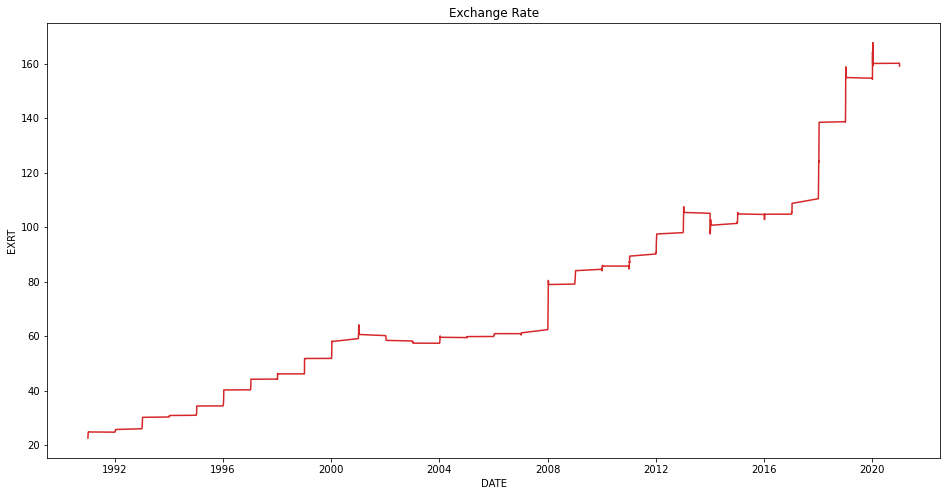

In [126]:
plt.figure(figsize=(16,8))
sns.lineplot(data.index, data.EXRT, color = 'tab:red')
plt.title("Exchange Rate")
plt.savefig("exrtline.png")
# increasing trend plus some seasonality

## Log Transormation

In [20]:
log_exrt = data.EXRT.apply(lambda x: np.log(x))
log_exrt.head()

DATE
1991-01-03    3.116196
1991-01-04    3.146314
1991-01-05    3.167254
1991-01-06    3.183211
1991-01-07    3.203888
Name: EXRT, dtype: float64

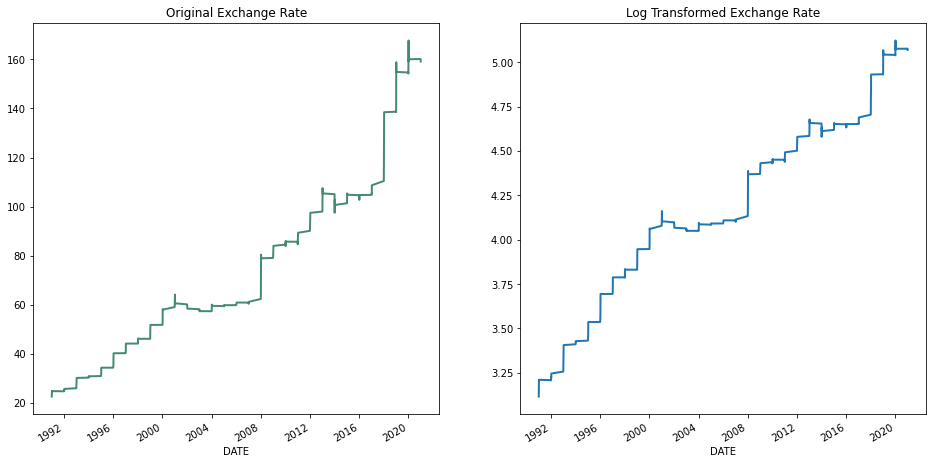

In [132]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
data.EXRT.plot(color = "#458B74", linewidth = 2, ax =ax1, title = "Original Exchange Rate")
ax2 = plt.subplot(122)
log_exrt.plot(title = "Log Transformed Exchange Rate", linewidth = 2)
plt.savefig("logexrt")

## ADF Test

In [165]:
dftest = adfuller(log_exrt)

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.8499790981693427
2. P-Value :  0.8039986662162932
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 358
5. Critical Values :
	 1% :  -3.448748905151901
	 5% :  -2.8696473721448728
	 10% :  -2.5710891239349585


## Taking First Difference

In [23]:
diff_exrt = log_exrt.diff()

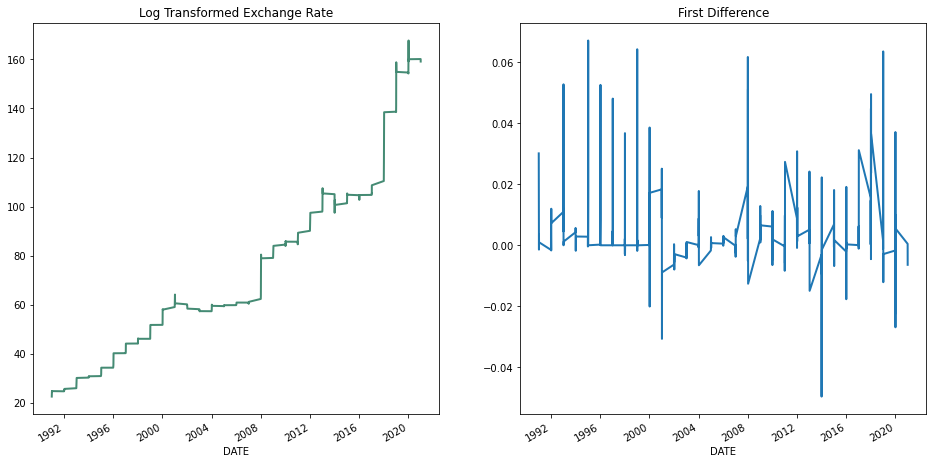

In [137]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
data.EXRT.plot(color = "#458B74", linewidth = 2, ax =ax1, title = "Log Transformed Exchange Rate")
ax2 = plt.subplot(122)
diff_exrt.plot(title = "First Difference", linewidth = 2)
plt.savefig("diffexrt")

## ADF of First Difference

In [25]:
dftest = adfuller(diff_exrt.dropna())

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -12.671783456619226
2. P-Value :  1.2400031310550344e-23
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 358
5. Critical Values :
	 1% :  -3.448748905151901
	 5% :  -2.8696473721448728
	 10% :  -2.5710891239349585


# Analyzing T-Bill Rate

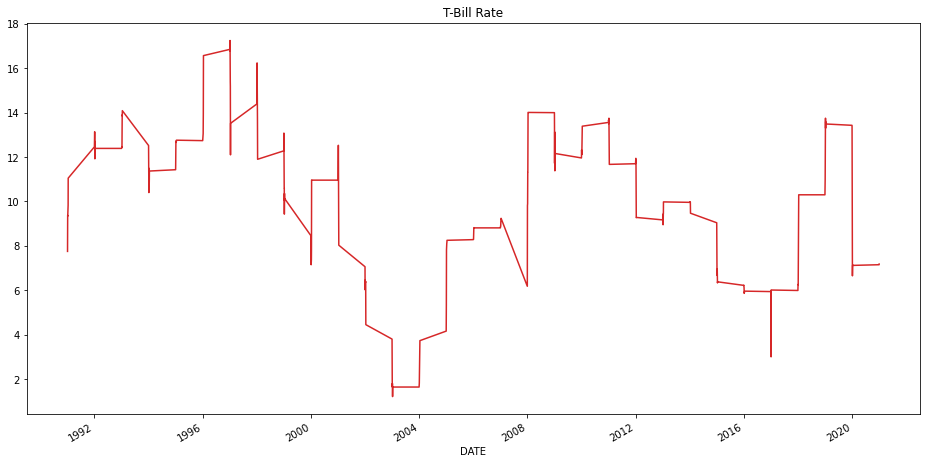

In [129]:
plt.figure(figsize=(16,8))
data["TBR"].plot(color = 'tab:red')
plt.title("T-Bill Rate")
plt.savefig('tbr_line.png')

# some seasonality

In [35]:
adfuller(data.TBR)

(-2.4536986074497276,
 0.1271500912588317,
 3,
 356,
 {'1%': -3.448853029339765,
  '5%': -2.869693115704379,
  '10%': -2.571113512498422},
 666.5438008612746)

In [37]:
diff_tbr = data.TBR.diff()

<AxesSubplot:xlabel='DATE'>

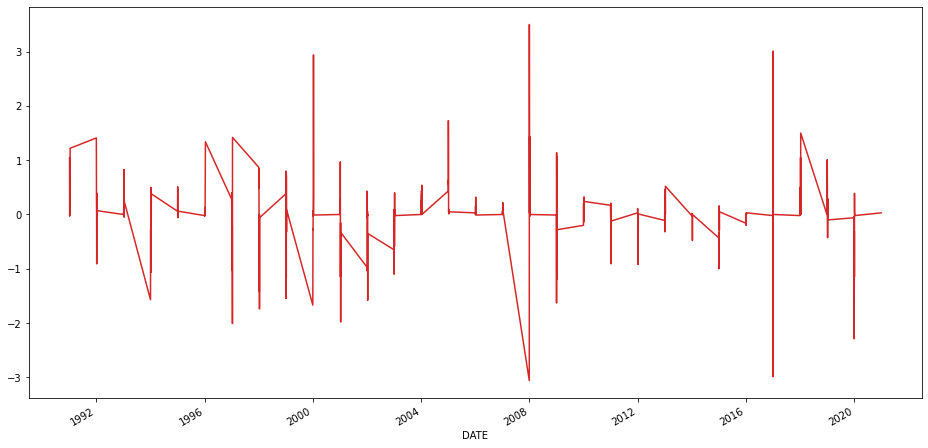

In [38]:
plt.figure(figsize=(16,8))
diff_tbr.plot(color = 'tab:red')

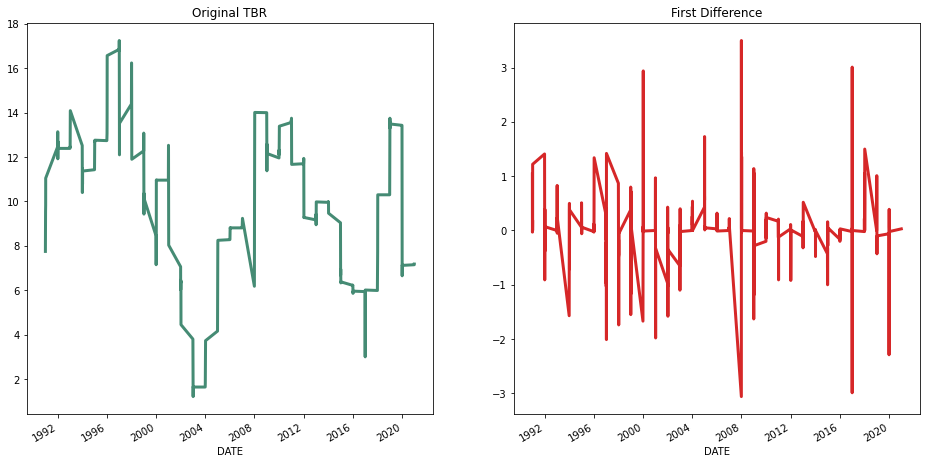

In [138]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
data.TBR.plot(color = "#458B74", linewidth = 3, ax =ax1, title = "Original TBR")
ax2 = plt.subplot(122)
diff_tbr.plot(color = "tab:red", title = "First Difference", linewidth = 3)
plt.savefig("tbrdiff")

In [42]:
adfuller(diff_tbr.dropna())
#stationary

(-8.579241423501063,
 7.809657966628173e-14,
 2,
 356,
 {'1%': -3.448853029339765,
  '5%': -2.869693115704379,
  '10%': -2.571113512498422},
 668.7505063255198)

# Analzing IPILSM

C:\Users\sarfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


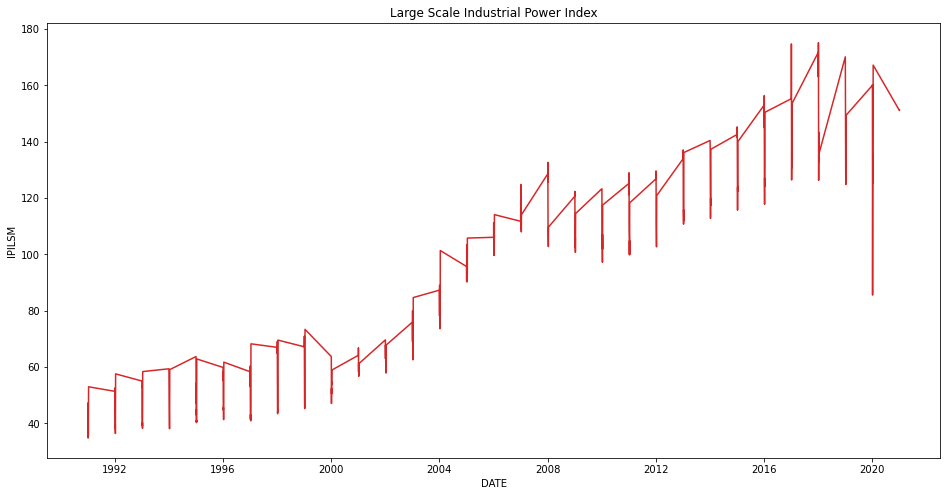

In [130]:
plt.figure(figsize=(16,8))
sns.lineplot(data.index, data.IPILSM, color = 'tab:red')
plt.title("Large Scale Industrial Power Index")
plt.savefig('ipilsm.png')
# increasing trend plus some seasonality

In [44]:
adfuller(data.IPILSM)
# Non Stationary

(-0.6500605476844848,
 0.85926456217513,
 14,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 2164.097486044918)

## Log Transformation

In [46]:
log_ipilsm = data["IPILSM"].apply(lambda x: np.log(x))
log_ipilsm

DATE
1991-01-03    3.854394
1991-01-04    3.663562
1991-01-05    3.638112
1991-01-06    3.550766
1991-01-07    3.607941
                ...   
2020-01-10    4.979213
2020-01-11    4.992607
2020-01-12    5.119251
2021-01-01    5.017876
2021-01-02    5.019000
Name: IPILSM, Length: 360, dtype: float64

<AxesSubplot:xlabel='DATE'>

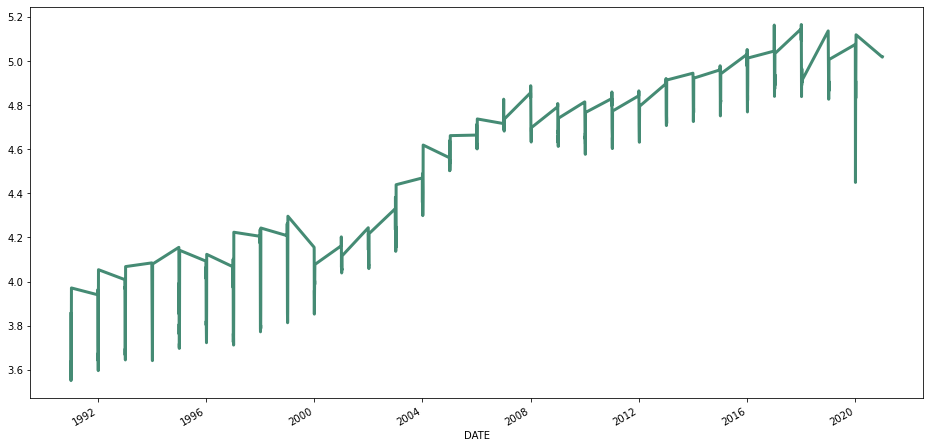

In [47]:
plt.figure(figsize=(16,8))
log_ipilsm.plot(color = "#458B74", linewidth = 3)

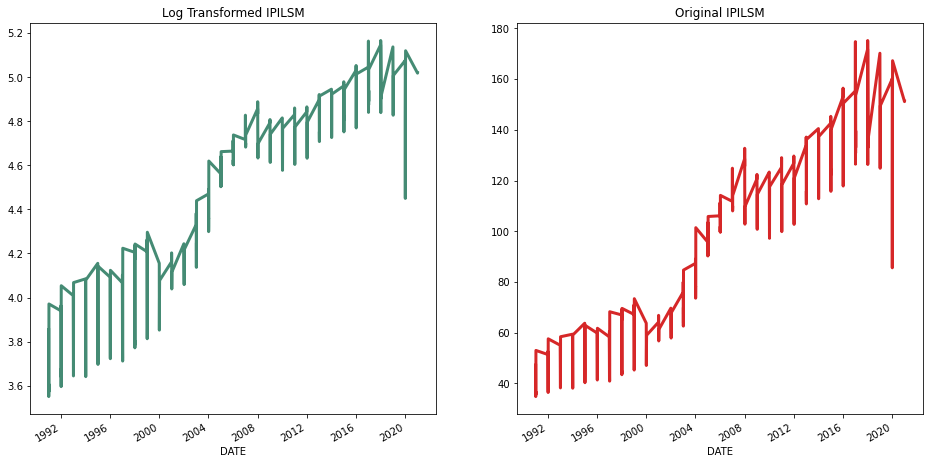

In [133]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
log_ipilsm.plot(color = "#458B74", linewidth = 3, ax =ax1, title = "Log Transformed IPILSM")
ax2 = plt.subplot(122)
data.IPILSM.plot(color = "tab:red", title = "Original IPILSM", linewidth = 3)
plt.savefig("ipilsmlog")

In [49]:
adfuller(log_ipilsm.dropna())

(-1.223969396376597,
 0.6632006380775934,
 14,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 -936.6951538555127)

## Taking First Difference

In [51]:
ipilsm_diff = log_ipilsm.diff()
ipilsm_diff.head()

DATE
1991-01-03         NaN
1991-01-04   -0.190832
1991-01-05   -0.025449
1991-01-06   -0.087346
1991-01-07    0.057174
Name: IPILSM, dtype: float64

<AxesSubplot:title={'center':'First Difference of Log Transformed IPILSM'}, xlabel='DATE'>

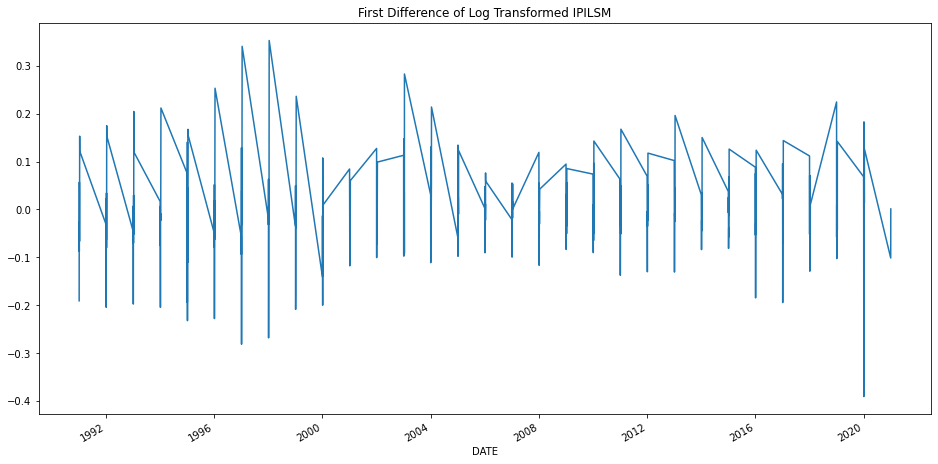

In [52]:
plt.figure(figsize=(16,8))
ipilsm_diff.plot(title = "First Difference of Log Transformed IPILSM")

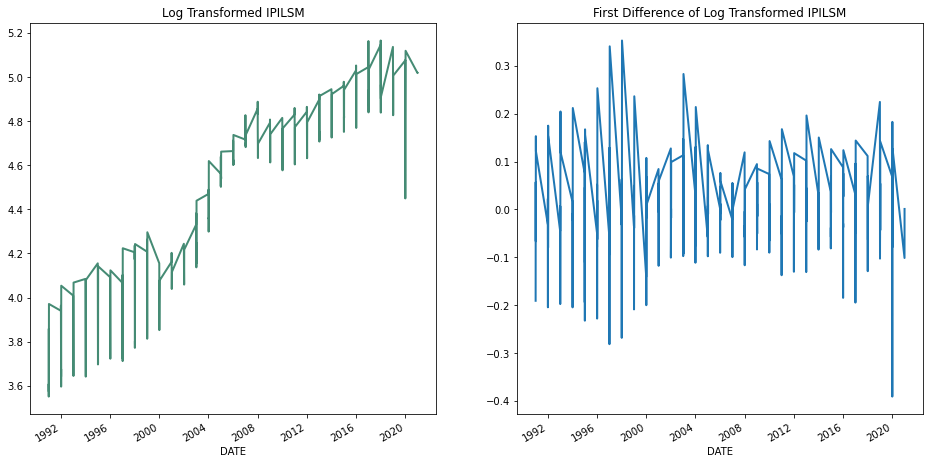

In [139]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
log_ipilsm.plot(color = "#458B74", linewidth = 2, ax =ax1, title = "Log Transformed IPILSM")
ax2 = plt.subplot(122)
ipilsm_diff.plot(title = "First Difference of Log Transformed IPILSM", linewidth = 2)
plt.savefig("ipidiff")

In [55]:
dftest = adfuller(ipilsm_diff.dropna())
#stationary

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.9690197152646767
2. P-Value :  0.0015817095871630067
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 341
5. Critical Values :
	 1% :  -3.449673193310592
	 5% :  -2.8700533746644323
	 10% :  -2.5713055939491403


# Analyzing CPI

C:\Users\sarfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


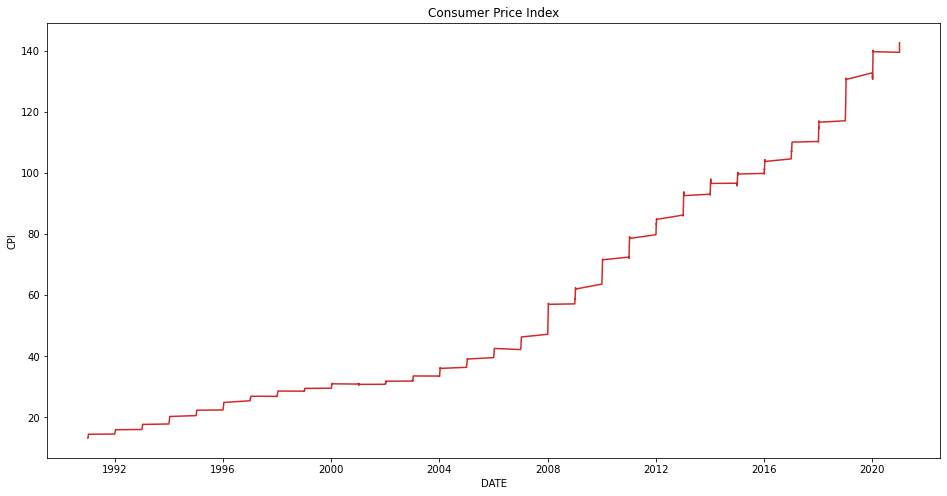

In [131]:
plt.figure(figsize=(16,8))
sns.lineplot(data.index, data.CPI, color = 'tab:red')
plt.title("Consumer Price Index")
plt.savefig("cpiline")
# increasing trend 

In [57]:
adfuller(data.CPI)
# Non Stationary

(2.5228832774818954,
 0.9990568598856561,
 16,
 343,
 {'1%': -3.449559661646851,
  '5%': -2.8700035112469626,
  '10%': -2.5712790073013796},
 558.6417078755237)

## Log Transformation

In [59]:
log_cpi = data["CPI"].apply(lambda x: np.log(x))
log_cpi.head()

DATE
1991-01-03    2.583243
1991-01-04    2.583243
1991-01-05    2.583243
1991-01-06    2.583243
1991-01-07    2.641910
Name: CPI, dtype: float64

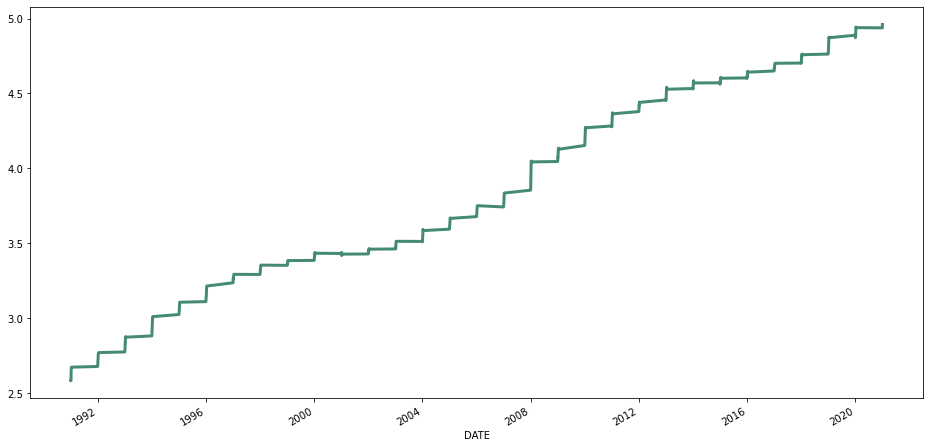

In [134]:
plt.figure(figsize=(16,8))
log_cpi.plot(color = "#458B74", linewidth = 3)
plt.savefig("cpilog")

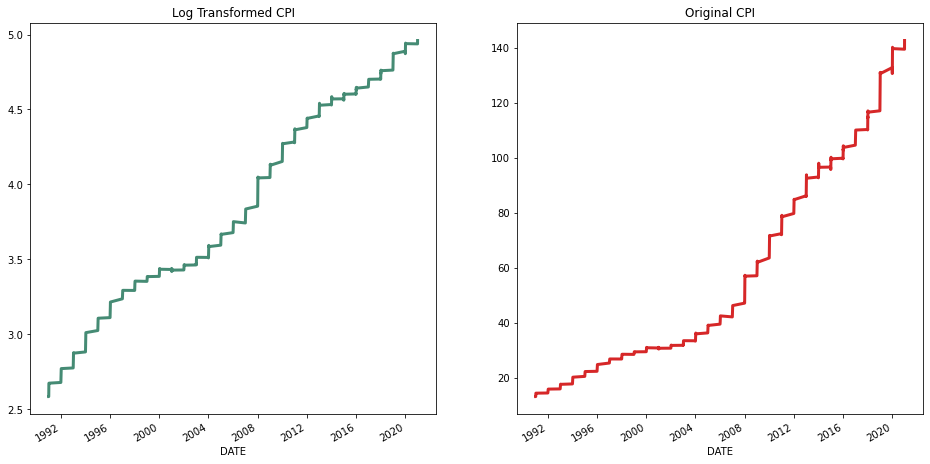

In [135]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
log_cpi.plot(color = "#458B74", linewidth = 3, ax =ax1, title = "Log Transformed CPI")
ax2 = plt.subplot(122)
data.CPI.plot(color = "tab:red", title = "Original CPI", linewidth = 3)
plt.savefig("cpilog")

In [166]:
adfuller(log_cpi)

(-0.318736795717088,
 0.9228084012599261,
 12,
 347,
 {'1%': -3.449336554273722,
  '5%': -2.8699055166063085,
  '10%': -2.571226758215748},
 -2384.606443600591)

In [62]:
cpi_diff = log_cpi.diff()
cpi_diff

DATE
1991-01-03         NaN
1991-01-04    0.000000
1991-01-05    0.000000
1991-01-06    0.000000
1991-01-07    0.058668
                ...   
2020-01-10    0.012572
2020-01-11    0.006370
2020-01-12   -0.003502
2021-01-01   -0.001576
2021-01-02    0.022408
Name: CPI, Length: 360, dtype: float64

<AxesSubplot:title={'center':'First Difference of Log Transformed CPI'}, xlabel='DATE'>

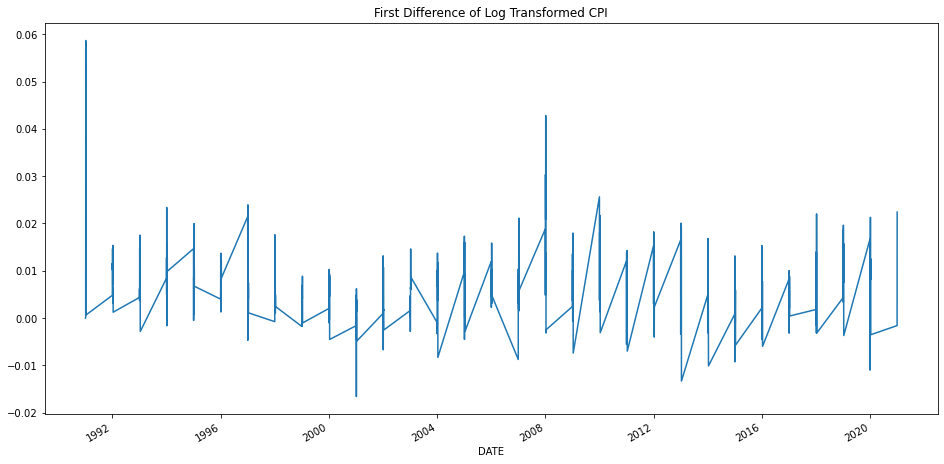

In [63]:
plt.figure(figsize=(16,8))
cpi_diff.plot(title = "First Difference of Log Transformed CPI")

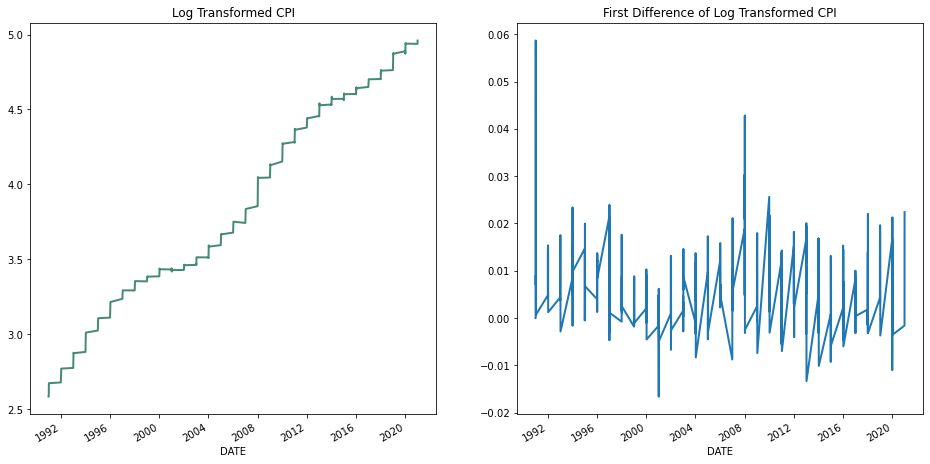

In [140]:
plt.figure(figsize=(16,8))
ax1  = plt.subplot(121)
log_cpi.plot(color = "#458B74", linewidth = 2, ax =ax1, title = "Log Transformed CPI")
ax2 = plt.subplot(122)
cpi_diff.plot(title = "First Difference of Log Transformed CPI", linewidth = 2)
plt.savefig("cpidiff")

In [66]:
dftest = adfuller(cpi_diff.dropna())
#stationary

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.329935024696221
2. P-Value :  0.013592266489216524
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 347
5. Critical Values :
	 1% :  -3.449336554273722
	 5% :  -2.8699055166063085
	 10% :  -2.571226758215748


In [94]:
  diff_exrt
print(ipilsm_diff)
print(cpi_diff)
print(diff_tbr)

DATE
1991-01-03         NaN
1991-01-04   -0.190832
1991-01-05   -0.025449
1991-01-06   -0.087346
1991-01-07    0.057174
                ...   
2020-01-10    0.045459
2020-01-11    0.013394
2020-01-12    0.126643
2021-01-01   -0.101375
2021-01-02    0.001125
Name: IPILSM, Length: 360, dtype: float64
DATE
1991-01-03         NaN
1991-01-04    0.000000
1991-01-05    0.000000
1991-01-06    0.000000
1991-01-07    0.058668
                ...   
2020-01-10    0.012572
2020-01-11    0.006370
2020-01-12   -0.003502
2021-01-01   -0.001576
2021-01-02    0.022408
Name: CPI, Length: 360, dtype: float64
DATE
1991-01-03     NaN
1991-01-04    1.04
1991-01-05    0.58
1991-01-06   -0.03
1991-01-07    0.06
              ... 
2020-01-10    0.03
2020-01-11    0.00
2020-01-12   -0.02
2021-01-01    0.03
2021-01-02    0.03
Name: TBR, Length: 360, dtype: float64


In [95]:
train = pd.DataFrame(diff_exrt)
train["IPILSM"] = ipilsm_diff
train["CPI"] = cpi_diff
train["TBR"] = diff_tbr

In [105]:
train = train.dropna()

In [107]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print()

Order = 1
AIC:  -24.055540633477584

Order = 2
AIC:  -24.060903858571887

Order = 3
AIC:  -24.0560117169985

Order = 4
AIC:  -24.252731886954155

Order = 5
AIC:  -24.210316765171946

Order = 6
AIC:  -24.24684938705877

Order = 7
AIC:  -24.258686954994964

Order = 8
AIC:  -24.423178532894074

Order = 9
AIC:  -24.46686133816373

Order = 10
AIC:  -24.65447905029657



C:\Users\sarfa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarfa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarfa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarfa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

In [108]:
result = model.fit(3)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, May, 2022
Time:                     17:11:05
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -23.4900
Nobs:                     356.000    HQIC:                  -23.8309
Log likelihood:           2313.40    FPE:                3.56996e-11
AIC:                     -24.0560    Det(Omega_mle):     3.09284e-11
--------------------------------------------------------------------
Results for equation EXRT
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.001239         0.001175            1.054           0.292
L1.EXRT           0.349183         0.053687            6.504           0.000
L1.IPILSM        -0.012658         0.007515           -1.684           0.092


In [118]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)

,IPILSM_x,TBR_x,CPI_x,EXRT_x
IPILSM_y,1.0000,0.0000,0.0,0.0000
TBR_y,0.7714,1.0000,0.0,0.0008
CPI_y,0.0000,0.0332,1.0,0.0001
EXRT_y,0.0013,0.1167,0.0,1.0000


In [119]:
dfi.export(grangers_causation_matrix(data, variables = data.columns), 'granger causality.png')

In [157]:
irf = result.irf(10)


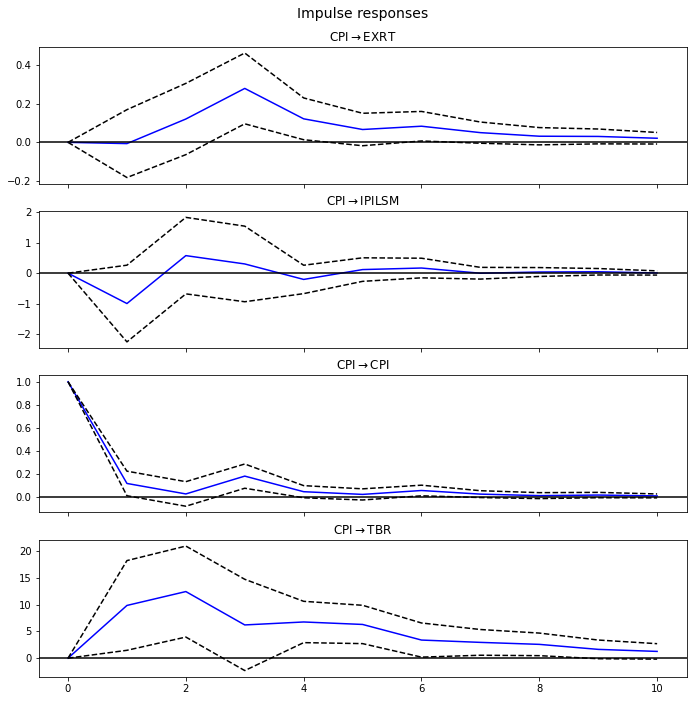

In [159]:
irf.plot(impulse="CPI")
plt.savefig("irfcpi")

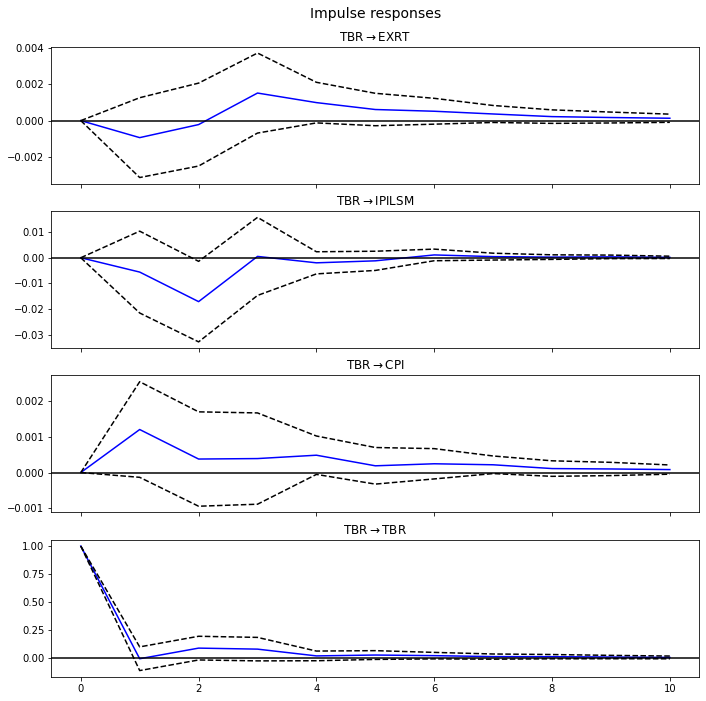

In [160]:
irf.plot(impulse="TBR")
plt.savefig("tbrirf")

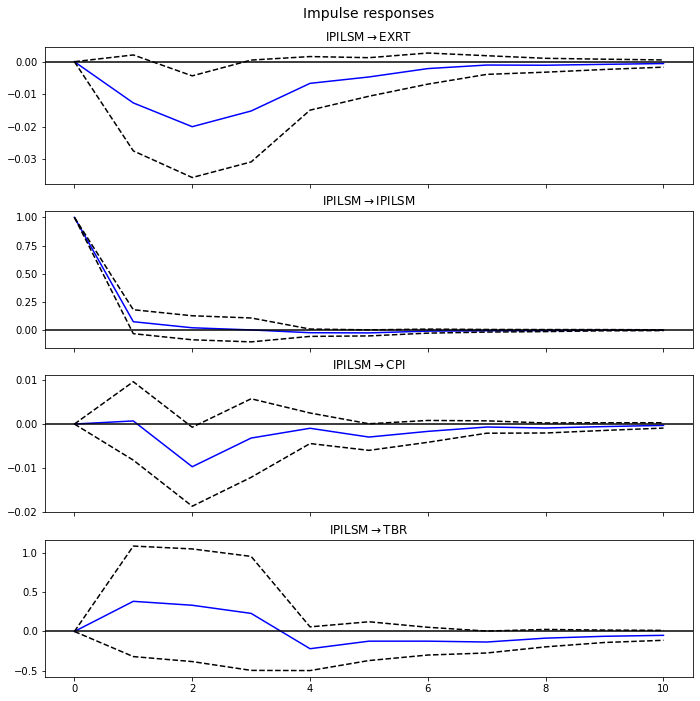

In [167]:
irf.plot(impulse="IPILSM")
plt.savefig("ipitbr")

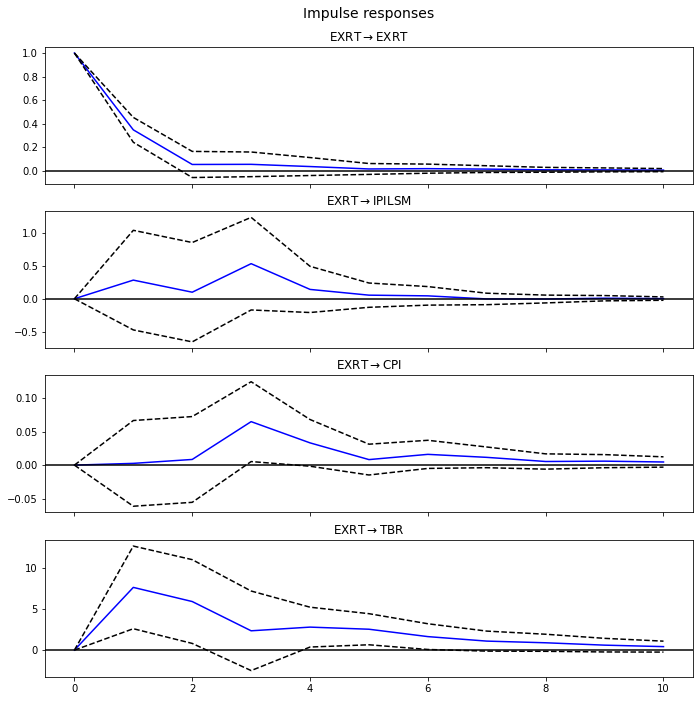

In [168]:
irf.plot(impulse="EXRT")
plt.savefig("exrtirf")

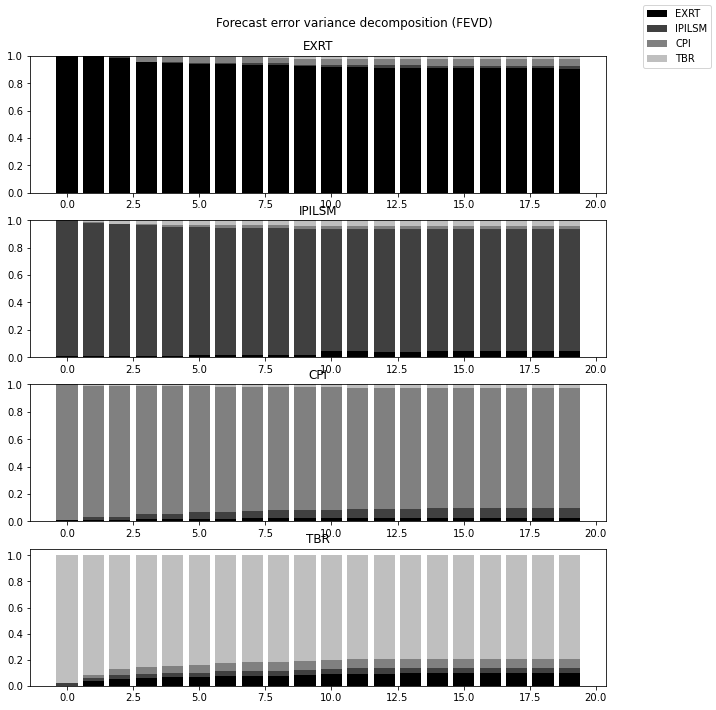

In [164]:
results.fevd(20).plot()
plt.savefig("variance.png")